<center><h1>House Price Notebook<h1:><center/>

<p>Le prix des logements est un reflet important de l'économie, et les fourchettes de prix présentent un grand intérêt pour les acheteurs et les vendeurs. Dans ce projet, les prix des logements seront prédits grâce à des variables explicatives qui couvrent de nombreux aspects des maisons résidentielles. L'objectif de ce projet est de créer un modèle de régression capable d'estimer avec précision le prix de la maison compte tenu de ses caractéristiques.

<p>Avec 79 variables explicatives décrivant (presque) chaque aspect des maisons résidentielles à Ames, en Iowa, ce concours vous met au défi de prédire le prix final de chaque maison. \\

<p>Notre objectif est de prévoir le prix de vente de chaque maison. Cela consiste à minimiser la distance entre le prix prédit et le prix réel pour différentes distances (RMSE/MSE).


<center><h2>Importation des packages<h2/><center/>

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression,Ridge, LinearRegression


<center><h2>Visualisation des données<h2/><center/>

In [3]:
sample_sub = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test_hp.csv")
train = pd.read_csv("train_hp.csv")

In [4]:

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
(train.shape,test.shape)

((1460, 81), (1459, 80))

## Informations dur les données d'apprentissage

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Statistiques sur les données d'apprentissage

In [8]:
for i in train.columns:
    print("Statistique pour la caractéristique: {0}".format(i))
    print(train[i].describe())
    print("---------------------------------------------")

Statistique pour la caractéristique: Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
---------------------------------------------
Statistique pour la caractéristique: MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
---------------------------------------------
Statistique pour la caractéristique: MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
---------------------------------------------
Statistique pour la caractéristique: LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: f

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
---------------------------------------------
Statistique pour la caractéristique: BsmtHalfBath
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
---------------------------------------------
Statistique pour la caractéristique: FullBath
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
---------------------------------------------
Statistique pour la caractéristique: HalfBath
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%       

## Chercher les valeurs NaN dans les données d'apprentissage

In [9]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Heatmap

<AxesSubplot:>

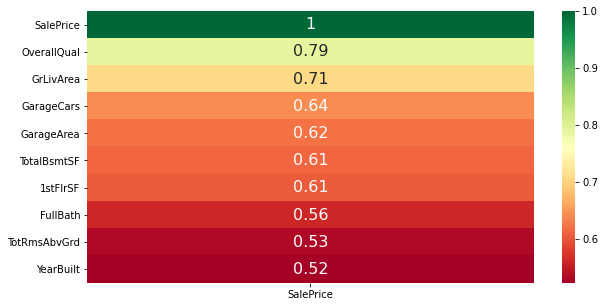

In [5]:
corr_new_train=train.corr()
plt.figure(figsize=(10,5))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(10),annot_kws={"size": 16}, annot=True,cmap='RdYlGn')

#### Dans la visualisation ci-dessus, nous pouvons voir les variables qui affectent SalePrice.

## Histogramme

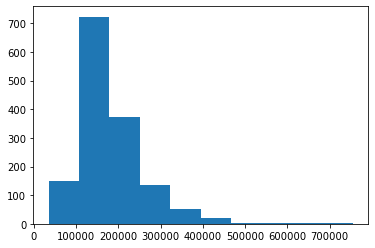

In [8]:
plt.hist(train['SalePrice'])
plt.show()

## Histogramme après l'application de la transforamtion log

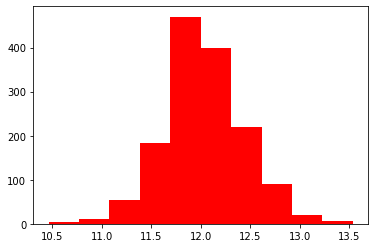

In [10]:
train['LT_SalePrice'] = np.log(train['SalePrice']+1)
plt.hist(train['LT_SalePrice'], color='red')
plt.show()

<center><h1>Nettoyage des données<h1/><center/>

In [11]:
## On combine les données pour leur apporter le même processus
train_test=pd.concat([train,test],axis=0,sort=False)

In [12]:
## Colonne avec des NA ayant un sens :
na_sens=['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for i in na_sens:
    train_test[str(i)] = train_test[str(i)].fillna('None')   

In [13]:
## On cherche les données avec des NaN Values
pd.set_option('display.max_rows', 5000)
nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'], ascending=False)
nan=nan.drop("SalePrice")
nan

,NaN_sum
LT_SalePrice,1459
LotFrontage,486
GarageYrBlt,159
MasVnrType,24
MasVnrArea,23
MSZoning,4
BsmtFullBath,2
BsmtHalfBath,2
Functional,2
Utilities,2


In [15]:
nan_features=nan.index
nan_features

Index(['LT_SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrType',
       'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Functional',
       'Utilities', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Exterior2nd', 'KitchenQual', 'Exterior1st', 'GarageCars', 'GarageArea',
       'SaleType', 'Electrical'],
      dtype='object')

In [16]:
train_test["LotFrontage"] = train_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [18]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test[col] = train_test[col].fillna(0)

train_test["MasVnrType"] = train_test["MasVnrType"].fillna("None")
train_test["MasVnrArea"] = train_test["MasVnrArea"].fillna(0)

train_test['MSZoning'] = train_test['MSZoning'].fillna(train_test['MSZoning'].mode()[0])

train_test = train_test.drop(['Utilities'], axis=1)

train_test["Functional"] = train_test["Functional"].fillna("Typ")

train_test['Electrical'] = train_test['Electrical'].fillna(train_test['Electrical'].mode()[0])

train_test['KitchenQual'] = train_test['KitchenQual'].fillna(train_test['KitchenQual'].mode()[0])

train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])

train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])

train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

train_test['MSSubClass'] = train_test['MSSubClass'].fillna("None")

In [19]:
len(train_test)

2919

In [20]:
objet= train_test.dtypes[train_test.dtypes == "object"].index
for col in objet:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [21]:
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LT_SalePrice
0,1,60,3,65.0,8450,1,1,3,3,4,...,3,4,1,0,2,2008,8,4,208500.0,12.247699
1,2,20,3,80.0,9600,1,1,3,3,2,...,3,4,1,0,5,2007,8,4,181500.0,12.109016
2,3,60,3,68.0,11250,1,1,0,3,4,...,3,4,1,0,9,2008,8,4,223500.0,12.317171
3,4,70,3,60.0,9550,1,1,0,3,0,...,3,4,1,0,2,2006,8,0,140000.0,11.849405
4,5,60,3,84.0,14260,1,1,0,3,2,...,3,4,1,0,12,2008,8,4,250000.0,12.429220


In [22]:
train=train_test[0:1460]
test=train_test[1460:2919]

<center><h3>Creation du modèle<h3/><center/>

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LT_SalePrice
0,1,60,3,65.0,8450,1,1,3,3,4,...,3,4,1,0,2,2008,8,4,208500.0,12.247699
1,2,20,3,80.0,9600,1,1,3,3,2,...,3,4,1,0,5,2007,8,4,181500.0,12.109016
2,3,60,3,68.0,11250,1,1,0,3,4,...,3,4,1,0,9,2008,8,4,223500.0,12.317171
3,4,70,3,60.0,9550,1,1,0,3,0,...,3,4,1,0,2,2006,8,0,140000.0,11.849405
4,5,60,3,84.0,14260,1,1,0,3,2,...,3,4,1,0,12,2008,8,4,250000.0,12.429220


In [28]:
X=train.drop(['SalePrice','LT_SalePrice'],axis=1)
y=train.LT_SalePrice
test=test.drop(['SalePrice'],axis=1)

In [29]:
std = StandardScaler()
X_std = std.fit_transform(X)
X = pd.DataFrame(X_std, columns = X.columns)

In [30]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,-0.230822,-0.207142,0.064238,0.024699,0.750731,0.314667,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.438051,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.628316,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,-0.097048,0.073480,0.064238,0.024699,-1.378933,0.314667,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,-0.453780,-0.096897,0.064238,0.024699,-1.378933,0.314667,-1.861302,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.616417,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.628316,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502
5,-1.719002,-0.163109,-0.045532,0.661009,0.360616,0.064238,0.024699,-1.378933,0.314667,0.604670,...,-0.270208,-0.068692,0.063305,-1.390058,5.190736,1.323736,1.360892,0.891994,0.313867,0.208502
6,-1.716629,-0.872563,-0.045532,0.215093,-0.043379,0.064238,0.024699,0.750731,0.314667,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.620891,-0.614439,0.313867,0.208502
7,-1.714256,0.073375,-0.045532,0.438051,-0.013513,0.064238,0.024699,-1.378933,0.314667,-1.861302,...,-0.270208,-0.068692,0.063305,0.457447,5.190736,0.618024,1.730892,0.891994,0.313867,0.208502
8,-1.711883,-0.163109,1.537245,-0.855104,-0.440659,0.064238,0.024699,0.750731,0.314667,0.604670,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.859110,0.138777,0.313867,-3.426284
9,-1.709511,3.147673,-0.045532,-0.899696,-0.310370,0.064238,0.024699,0.750731,0.314667,-1.861302,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.969111,0.138777,0.313867,0.208502


In [35]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [38]:
y

array([412, 339, 442, ..., 527, 199, 221], dtype=int64)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)

## Gradient Boosting Regressor

In [40]:
gb_reg = GradientBoostingRegressor(n_estimators=1700, learning_rate=0.02, max_features='sqrt', loss='huber')
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('GBR :')
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

GBR :
R square Accuracy:  0.9562224789033382
Mean Absolute Error Accuracy:  28.467841929901137
Mean Squared Error Accuracy:  1409.7626814794007


## Ridge

In [41]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_head=ridge.predict(X_test)
print('Ridge :')
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

Ridge :
R square Accuracy:  0.9066013042188431
Mean Absolute Error Accuracy:  40.97101070762021
Mean Squared Error Accuracy:  3007.7078946611027


## MPLRegressor

In [42]:
mlp_reg =MLPRegressor(max_iter=1000)
mlp_reg.fit(X_train, y_train)
y_head=mlp_reg.predict(X_test)
print('Logi reg :')
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

Logi reg :
R square Accuracy:  0.9222106593953898
Mean Absolute Error Accuracy:  37.5008311342728
Mean Squared Error Accuracy:  2505.041552241573


C:\Users\Oqaid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Linear Regressor

In [43]:
lr_reg =LinearRegression()
lr_reg.fit(X_train, y_train)
y_head=lr_reg.predict(X_test)
print('Linear Regression :')
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

Linear Regression :
R square Accuracy:  0.9065361700483681
Mean Absolute Error Accuracy:  40.975911915041195
Mean Squared Error Accuracy:  3009.8054031660286


### Submission

In [ ]:
test_pred_gb=gb_reg.predict(test)
test_pred_gb=pd.DataFrame(test_pred_gb,columns=['SalePrice'])
test_pred_gb.SalePrice =np.floor(np.expm1(test_pred_gb.SalePrice))

In [ ]:
sample_sub['SalePrice']=test_pred_gb
sample_sub.head()

In [ ]:
sample_sub.to_csv("new_submission.csv", index=False)

## Conclusion

Après avoir suivi un certain nombre de processus, nous avons réussi à construire et à évaluer quatre types différents de modèles de régression linéaire en python , en choisissant le meilleur modèle pour notre ensemble de données. Chaque modèle que nous avons construit possède ses propres concepts statistiques et mathématiques. 
Bien que la régression linéaire soit le concept le plus basique de machine learning, elle n'en est pas moins puissante pour construire des modèles.
